# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [1]:
#load the required packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

#for display purposes
import pandas

In [2]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 2026826
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

#### STUDENT NOTES:
It has been added as additional parameter *as_frame=False* into the *fetch_openml* function in order to deal with *numpy.ndarray* instead of *pandas.DataFrame*

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# rescale the data
X, y = mnist.data / 255., mnist.target

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [4]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([51, 64, 40, 52, 51, 45, 46, 44, 49, 58], dtype=int64))

#### STUDENT NOTES
In the following block checks if there are at least 10 elements for each label. If not, it will be added permutations until the condition is satisfied.

In [5]:
labels, labels_qty = np.unique(y_train, return_counts = True)

while(not(np.all(labels_qty >= 10))):
    permutation = np.random.permutation(X.shape[0])

    X = X[permutation]
    y = y[permutation]

    m_training = 500

    X_train, X_test = X[:m_training], X[m_training:]
    y_train, y_test = y[:m_training], y[m_training:]
    
    labels, labels_qty = np.unique(y_train, return_counts = True)
 
np.unique(y_train, return_counts = True)  

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([51, 64, 40, 52, 51, 45, 46, 44, 49, 58], dtype=int64))

We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [6]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


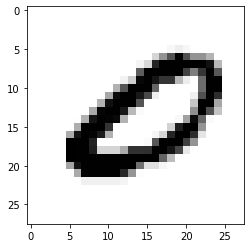

LABEL: 0
INPUT:


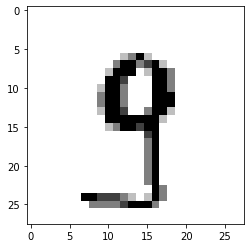

LABEL: 9


In [7]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## TO DO 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model uusing 5-fold CV 
#and train it using all the training data

# ADD CODE
linear_kernel = GridSearchCV(linear_SVM, parameters)

linear_kernel.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(linear_kernel.best_params_)

print("Score with best parameters:")
# ADD CODE
print(linear_kernel.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
#print("Mean test scores: ", linear_kernel.cv_results_['mean_test_score'])
params = linear_kernel.cv_results_['params']
scores = linear_kernel.cv_results_['mean_test_score']
results = [{'C' : value['C'], 'score' : scores[index]} for index, value in enumerate(params)]
display(pandas.DataFrame(results).T)

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
poly2_kernel = GridSearchCV(poly2_SVM, parameters)

poly2_kernel.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(poly2_kernel.best_params_)

print("Score with best parameters:")
# ADD CODE
print(poly2_kernel.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
#print("Mean test scores: ", poly2_kernel.cv_results_['mean_test_score'])
params = poly2_kernel.cv_results_['params']
scores = poly2_kernel.cv_results_['mean_test_score']
results = [{'C' : value['C'], 'gamma' : value['gamma'], 'score' : scores[index]} for index, value in enumerate(params)]
display(pandas.DataFrame(results).T)

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL

rbf_kernel = GridSearchCV(rbf_SVM, parameters)

rbf_kernel.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(rbf_kernel.best_params_)

print("Score with best parameters:")
# ADD CODE
print(rbf_kernel.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
#print("Mean test scores: ", rbf_kernel.cv_results_['mean_test_score'])
params = rbf_kernel.cv_results_['params']
scores = rbf_kernel.cv_results_['mean_test_score']
results = [{'C' : value['C'], 'gamma' : value['gamma'], 'score' : scores[index]} for index, value in enumerate(params)]
display(pandas.DataFrame(results).T)

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.852

All scores on the grid:


,0,1,2
C,1.000,10.000,100.000
score,0.852,0.852,0.852



RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.86

All scores on the grid:


,0,1,2,3,4,5,6,7,8
C,1.00,1.00,1.00,10.000,10.00,10.00,100.00,100.00,100.00
gamma,0.01,0.10,1.00,0.010,0.10,1.00,0.01,0.10,1.00
score,0.83,0.86,0.86,0.858,0.86,0.86,0.86,0.86,0.86



RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8880000000000001

All scores on the grid:


,0,1,2,3,4,5,6,7,8
C,1.000,1.000,1.000,10.000,10.000,10.000,100.000,100.000,100.000
gamma,0.010,0.100,1.000,0.010,0.100,1.000,0.010,0.100,1.000
score,0.862,0.546,0.128,0.888,0.592,0.128,0.888,0.592,0.128


## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [9]:
#get training and test error for the best SVM model from CV
scores_SVM = [linear_kernel.best_score_, poly2_kernel.best_score_, rbf_kernel.best_score_]
kernels_SVM = [linear_kernel, poly2_kernel, rbf_kernel]

best = np.argmax(scores_SVM)
params = kernels_SVM[best].best_estimator_.get_params()
print("Best SVM chosen: " +
      "kernel=" + str(params['kernel']) + 
      ", C=" + str(params['C']) +
      ", gamma=" + str(params["gamma"]))

best_SVM = kernels_SVM[best].best_estimator_ # ADD CODE

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM chosen: kernel=rbf, C=10, gamma=0.01
Best SVM training error: 0.000000
Best SVM test error: 0.106863


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

#### STUDENT NOTES
For the regular LR and for the LR with CV is set *max_iter=1000* to don't display the warning messagges thrown by the system.

In [10]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(max_iter=1000)
# fit the model on the training data
# ADD CODE
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1 - lr.score(X_train, y_train) # COMPLETE
test_error = 1 - lr.score(X_test, y_test) # COMPLETE
print ("Regular Logistic Regression")
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=5, max_iter=1000).fit(X_train, y_train) # COMPLETE
training_error_cv = 1 - lr_cv.score(X_train, y_train) # COMPLETE
test_error_cv = 1 - lr_cv.score(X_test, y_test) # COMPLETE

print ("\nLR after 5-fold Cross Validation")
print ("Best logistic regression training error: %f" % training_error_cv)
print ("Best logistic regression test error: %f" % test_error_cv)

Regular Logistic Regression
Best logistic regression training error: 0.000000
Best logistic regression test error: 0.148806

LR after 5-fold Cross Validation
Best logistic regression training error: 0.000000
Best logistic regression test error: 0.155180


In [11]:
#line added to compare the regular LR with the LR trained with CV
print("Best C obtained: ", lr_cv.C_[0], "\t[due to the default settings is the same for each class]")

Best C obtained:  10000.0 	[due to the default settings is the same for each class]


## TO DO 4 
Compare and comment the results from SVM and logistic regression.

#### ANSWER
The SVM has good results with all the trained kernels, in fact the lowest score is around the 85.2% and it's reached by the linear kernel.<br>
The **best results** is obtained by the non-linear *RBF kernel* with *C=10* and *gamma=0.01* and a **score of 88.8%**.<br>
If we compare the parameters tested during the cross validation we can observe that it has been chosen, among the set values:
1. **the middle value for C**, this means that the CV has obtain the best results by giving an "equal importance" among the complexity (the regularization) of the model and the empirical risk;
2. **the lowest value for gamma**, this implies that the CV has detected an influence among far samples in the training set** 

The regular LR and the LR obtained with the CV (LR and LR_CV from now) have obtained training error equals to zero, this means that the training set is linearly separable. Also, we can observe that both test errors are quite similiar to the best test error (*1-score*) obtained with the SVM trained with a linear kernel (they are all around 15%). This is expected because Logistic Regression is applied by using a linear model and, as the SVM with linear kernel, it's trying to build an halfspace that divides the samples in the dataset.
Another observation is that the LR have the regularization parameter *C=1*; instead the LR_CV has found out *C=10000* as the best regularization parameter, this is like not considering the hypothesis complexity for training the final model.

Even if the data are linearly separable, the **best result** is obtained by the **SVM model with RBF kernel**, that is a non linear kernel, with a **test error of 10.7%** (against the 14.9% of LR and 15.5% of LR_CV).<br>
**Therefore the non linear model (thanks to the kernel trick) is the one that best represents the real world.**

## TO DO 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

INPUT:


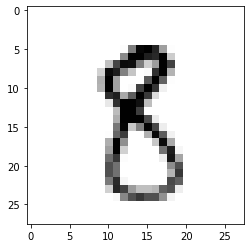

LABEL: 8
INPUT:


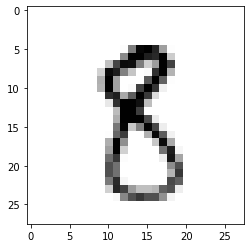

LABEL: 5


In [12]:
# ADD CODE

svm_labels = best_SVM.predict(X_test)
lr_cv_labels = lr_cv.predict(X_test)
for index, value in enumerate(y_test):
    if (value != lr_cv_labels[index]) and (value == svm_labels[index]):
        plot_digit(X_test, svm_labels, index)
        plot_digit(X_test, lr_cv_labels, index)
        break        

## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

In [13]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([100, 134,  98, 100,  76,  84,  95, 116, 112,  85], dtype=int64))

#### STUDENT NOTES
In the following block checks if there are at least 10 elements for each label. If not, it will be added permutations until the condition is satisfied.

In [14]:
labels, labels_qty = np.unique(y_train, return_counts = True)


while(not(np.all(labels_qty >= 10))):
    permutation = np.random.permutation(X.shape[0])

    X = X[permutation]
    y = y[permutation]

    m_training = 1000

    X_train, X_test = X[:m_training], X[m_training:]
    y_train, y_test = y[:m_training], y[m_training:]
    
    labels, labels_qty = np.unique(y_train, return_counts = True)
 
np.unique(y_train, return_counts = True)  

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([100, 134,  98, 100,  76,  84,  95, 116, 112,  85], dtype=int64))

## SVM with Cross Validation
Run SVM with 5-fold cross validation to pick a kernel and values of parameters.

As before, it's trained and chosen among the following parameters:
1. **kernel** = [linear , polynomial with degree 2 , rbf]
2. **C** = [1, 10, 100]
3. **gamma** = [1, 0.1, 0.01] *(only for polynomial and rbf kernels)*

In [15]:

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model uusing 5-fold CV 
#and train it using all the training data

# ADD CODE
linear_kernel = GridSearchCV(linear_SVM, parameters)

linear_kernel.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(linear_kernel.best_params_)

print("Score with best parameters:")
# ADD CODE
print(linear_kernel.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
#print("Mean test scores: ", linear_kernel.cv_results_['mean_test_score'])
params = linear_kernel.cv_results_['params']
scores = linear_kernel.cv_results_['mean_test_score']
results = [{'C' : value['C'], 'score' : scores[index]} for index, value in enumerate(params)]
display(pandas.DataFrame(results).T)

# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
poly2_kernel = GridSearchCV(poly2_SVM, parameters)

poly2_kernel.fit(X_train, y_train)

print ('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(poly2_kernel.best_params_)

print("Score with best parameters:")
# ADD CODE
print(poly2_kernel.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
#print("Mean test scores: ", poly2_kernel.cv_results_['mean_test_score'])
params = poly2_kernel.cv_results_['params']
scores = poly2_kernel.cv_results_['mean_test_score']
results = [{'C' : value['C'], 'gamma' : value['gamma'], 'score' : scores[index]} for index, value in enumerate(params)]
display(pandas.DataFrame(results).T)

# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL

rbf_kernel = GridSearchCV(rbf_SVM, parameters)

rbf_kernel.fit(X_train, y_train)

print ('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
# ADD CODE
print(rbf_kernel.best_params_)

print("Score with best parameters:")
# ADD CODE
print(rbf_kernel.best_score_)

print("\nAll scores on the grid:")
# ADD CODE
#print("Mean test scores: ", rbf_kernel.cv_results_['mean_test_score'])
params = rbf_kernel.cv_results_['params']
scores = rbf_kernel.cv_results_['mean_test_score']
results = [{'C' : value['C'], 'gamma' : value['gamma'], 'score' : scores[index]} for index, value in enumerate(params)]
display(pandas.DataFrame(results).T)

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.868

All scores on the grid:


,0,1,2
C,1.000,10.000,100.000
score,0.868,0.868,0.868



RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.884

All scores on the grid:


,0,1,2,3,4,5,6,7,8
C,1.000,1.000,1.000,10.000,10.000,10.000,100.000,100.000,100.000
gamma,0.010,0.100,1.000,0.010,0.100,1.000,0.010,0.100,1.000
score,0.869,0.884,0.884,0.883,0.884,0.884,0.884,0.884,0.884



RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 100, 'gamma': 0.01}
Score with best parameters:
0.9040000000000001

All scores on the grid:


,0,1,2,3,4,5,6,7,8
C,1.000,1.000,1.000,10.000,10.000,10.000,100.000,100.000,100.000
gamma,0.010,0.100,1.000,0.010,0.100,1.000,0.010,0.100,1.000
score,0.895,0.547,0.134,0.903,0.591,0.134,0.904,0.591,0.134


## Model training on the best SVM founded and computuing its errors

In [16]:
#get training and test error for the best SVM model from CV
scores_SVM = [linear_kernel.best_score_, poly2_kernel.best_score_, rbf_kernel.best_score_]
kernels_SVM = [linear_kernel, poly2_kernel, rbf_kernel]

best = np.argmax(scores_SVM)
params = kernels_SVM[best].best_estimator_.get_params()
print("Best SVM chosen: " +
      "kernel=" + str(params['kernel']) + 
      ", C=" + str(params['C']) +
      ", gamma=" + str(params["gamma"]))

best_SVM = kernels_SVM[best].best_estimator_ # ADD CODE

# fit the model on the entire training set
# ADD CODE
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM chosen: kernel=rbf, C=100, gamma=0.01
Best SVM training error: 0.000000
Best SVM test error: 0.080478


## Use logistic regression for comparison

Training model on regular logistic regression first and then with 5-fold cross validation

In [17]:
lr = linear_model.LogisticRegression(max_iter=1000)
# fit the model on the training data
# ADD CODE
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1 - lr.score(X_train, y_train) # COMPLETE
test_error = 1 - lr.score(X_test, y_test) # COMPLETE
print ("Regular Logistic Regression")
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=5, max_iter=1000).fit(X_train, y_train) # COMPLETE
training_error_cv = 1 - lr_cv.score(X_train, y_train) # COMPLETE
test_error_cv = 1 - lr_cv.score(X_test, y_test) # COMPLETE

print ("\nLR after 5-fold Cross Validation")
print ("Best logistic regression training error: %f" % training_error_cv)
print ("Best logistic regression test error: %f" % test_error_cv)

Regular Logistic Regression
Best logistic regression training error: 0.000000
Best logistic regression test error: 0.138116

LR after 5-fold Cross Validation
Best logistic regression training error: 0.003000
Best logistic regression test error: 0.135362


In [18]:
#line added to compare the regular LR with the LR trained with CV
print("Best C obtained: ", lr_cv.C_[0], "\t[due to the default settings is the same for each class]")

Best C obtained:  0.3593813663804626 	[due to the default settings is the same for each class]


## Digit missclassified by logistic regression and correctly classified by the "best" SVM.

INPUT:


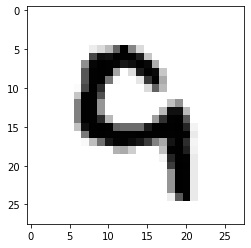

LABEL: 9
INPUT:


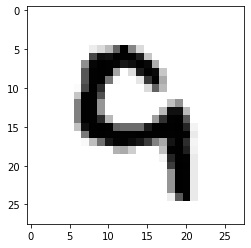

LABEL: 4


In [19]:
# ADD CODE

svm_labels = best_SVM.predict(X_test)
lr_cv_labels = lr_cv.predict(X_test)
for index, value in enumerate(y_test):
    if (value != lr_cv_labels[index]) and (value == svm_labels[index]):
        plot_digit(X_test, svm_labels, index)
        plot_digit(X_test, lr_cv_labels, index)
        break

## TO DO 7
Compare and comment on the differences with the results above.

#### ANSWER
In terms of numerical results, they are improved by training the model with more samples and, as before, the **best error** on the overall experiment is obtained by the SVM with RBF kernel with a **test error** equals to **8%** and the final results of the linear regression models are quite similar to the SVM with linear kernel, with an error around 13% (as seen in the previous reasoning).

However, with 1000 samples there are 2 main differences on the regularization parameter C:
1. **SVM with RBF kernel:** C is increased by 100 times (C=10 with 500 samples, C=100 with 1000 samples), this give more weight to the empirical risk rather the hypoteshis complexity
2. **LR_CV:** C is drastically decrease from 10000 to 0.36, this means that by training the model with more samples (they are doubled up) the empirical risk is nearly irrelevant and the hypotesis complexity has more importance.